In [1]:
import os
import sys
import git
import pathlib

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

PROJ_ROOT_PATH = pathlib.Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
PROJ_ROOT =  str(PROJ_ROOT_PATH)
if PROJ_ROOT not in sys.path:
    sys.path.append(PROJ_ROOT)

print(f"Project Root Directory: {PROJ_ROOT}")

Project Root Directory: /repos/drl_csense


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import scipy.fftpack as spfft
from sklearn.linear_model import Lasso

In [4]:
from lib.folder_paths import makeget_logging_dir
from lib.folder_paths import get_exp_name_tag, deconstruct_exp_name

In [5]:
import imageio
import ipyplot

In [6]:
env_id = "BreakoutNoFrameskip-v4"
exp_param_type = "noisy"
exp_param_value = 0.0
run_no = 0
model_type = "best"
eval_param_type = exp_param_type

In [8]:
eval_param_value = 0.0

# Get names and tags of experiment
exp_name, exp_metaname, exp_tag = get_exp_name_tag(env_id, exp_param_type, exp_param_value)

# Get directories
models_dir, log_dir, gif_dir, image_dir = makeget_logging_dir(exp_name)

# Load gif fil
obs_gif_file = f"{gif_dir}/{exp_name}-run_{run_no}--eval_{model_type}-{eval_param_type}_{eval_param_value}--obs.gif"

obs_gif_frames = imageio.mimread(obs_gif_file)

FileNotFoundError: No such file: '/repos/drl_csense/logging/BreakoutNoFrameskip-v4--noisy/BreakoutNoFrameskip-v4--noisy_0.0/gifs/BreakoutNoFrameskip-v4--noisy_0.0-run_0--eval_best-noisy_0.0--obs.gif'

In [8]:
obs_gif_frames_np = np.array(obs_gif_frames)

In [9]:
obs_gif_frames_single_layer = obs_gif_frames_np[:,:,:,1]

In [10]:
frame = obs_gif_frames_single_layer[0,:,:]

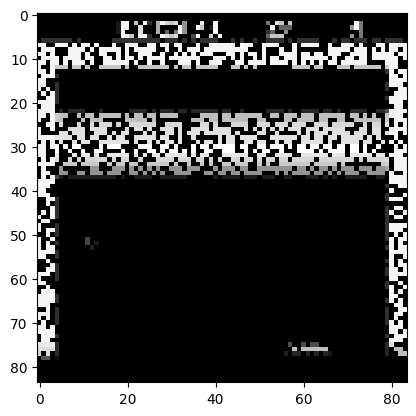

In [11]:
plt.imshow(frame, cmap="gray")

In [12]:
X = frame

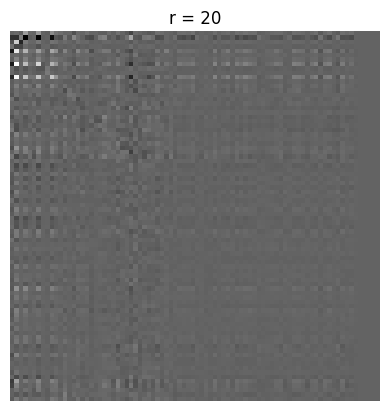

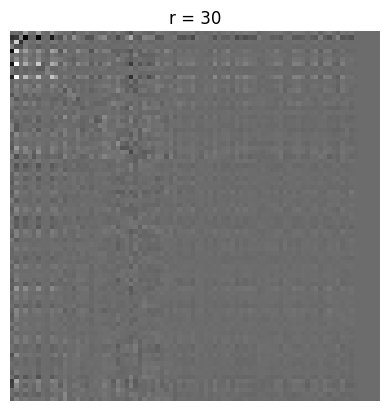

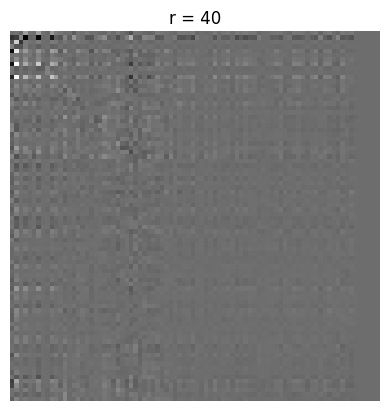

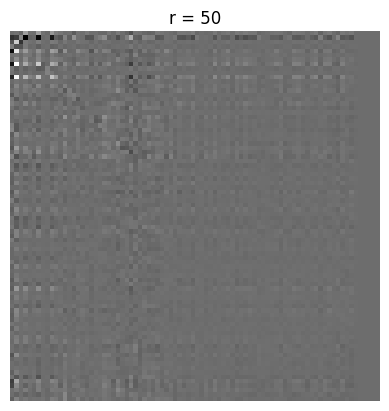

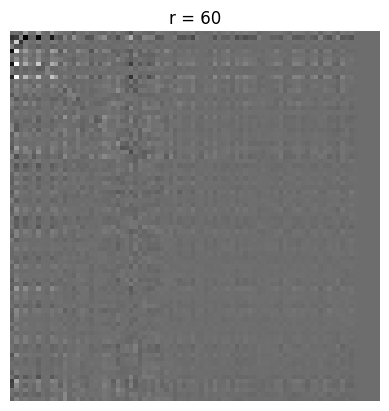

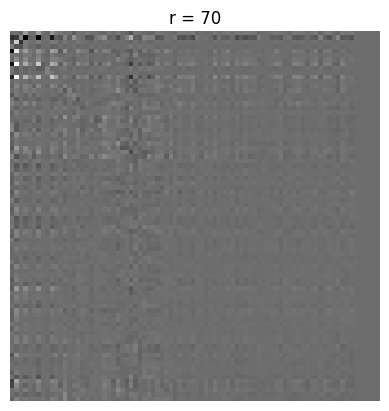

In [13]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (20,30, 40, 50, 60, 70):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox.T)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

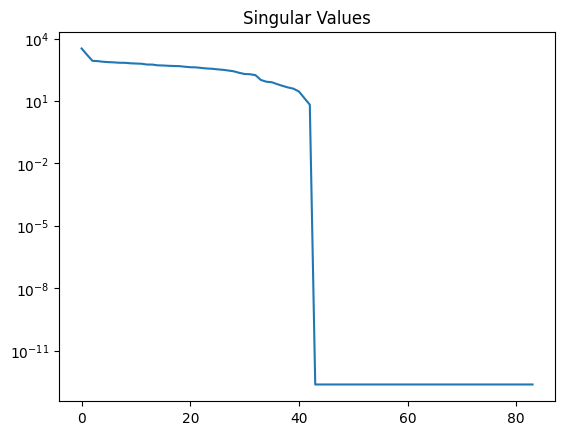

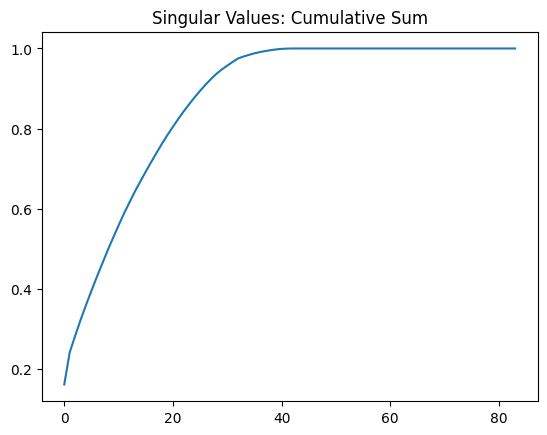

In [14]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

In [15]:
gif_block_size = 16
gif_block = obs_gif_frames_single_layer[:gif_block_size]

In [16]:
gif_block.shape

(16, 84, 84)

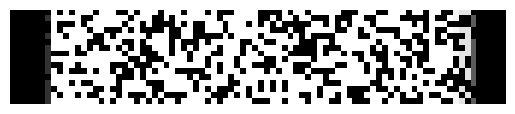

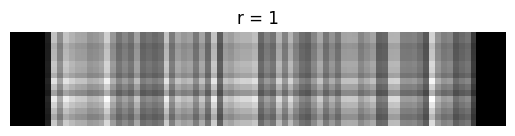

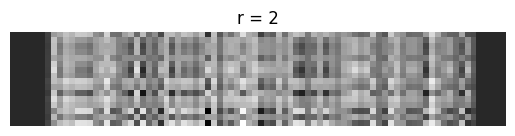

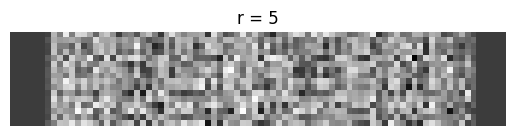

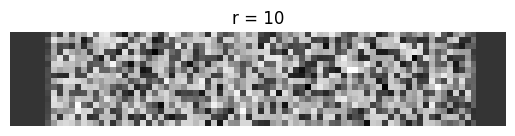

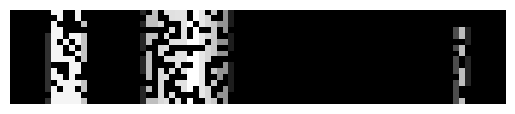

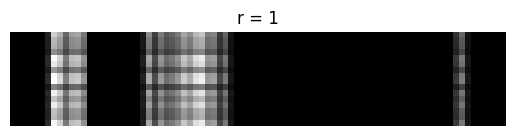

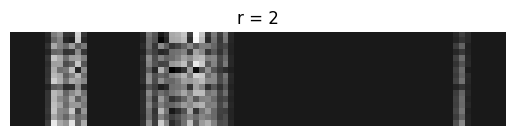

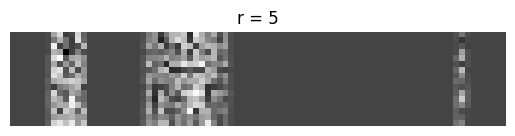

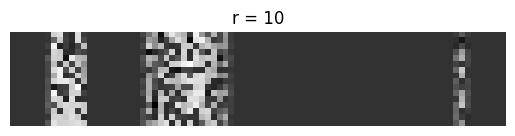

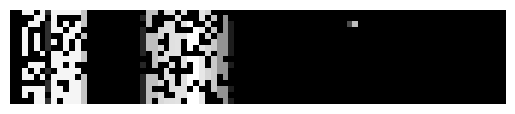

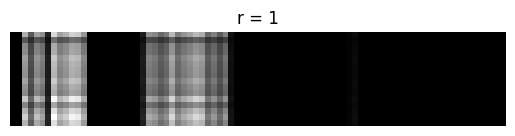

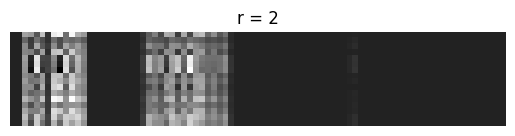

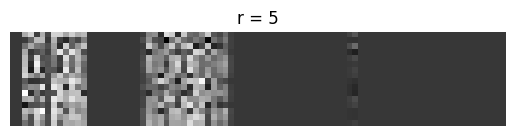

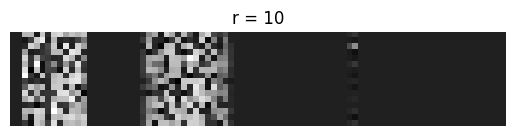

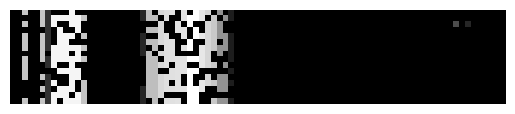

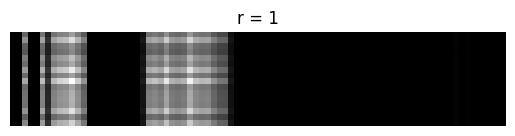

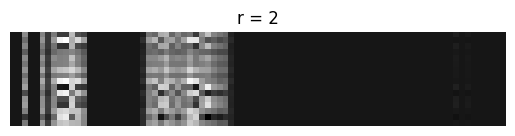

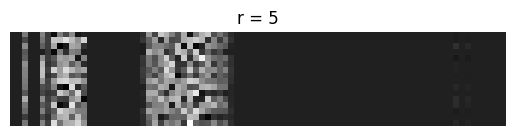

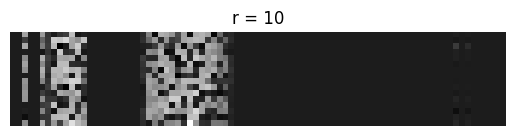

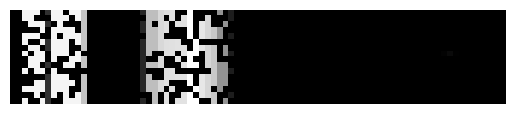

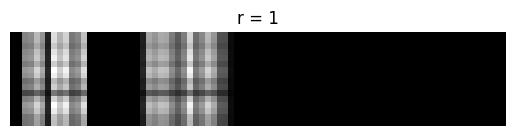

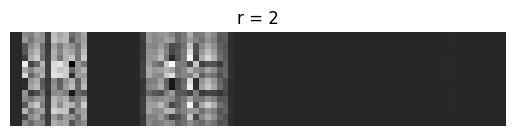

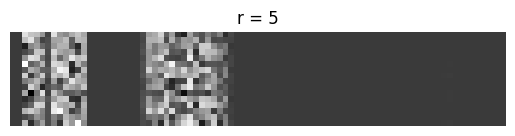

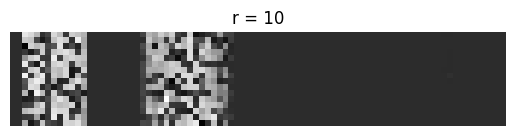

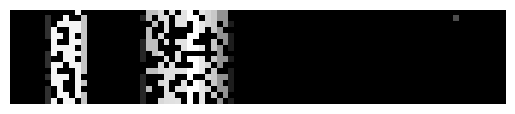

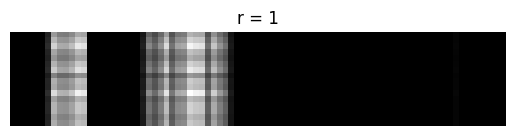

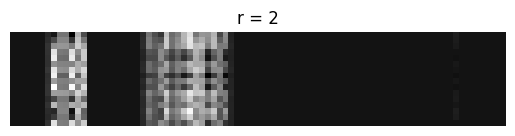

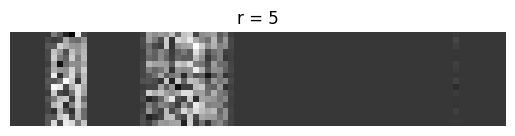

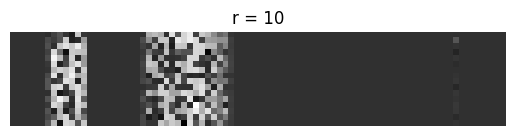

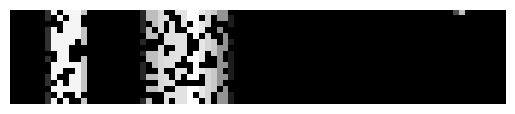

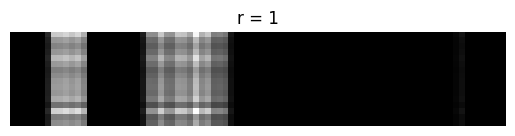

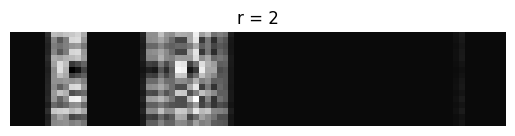

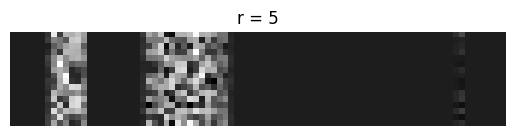

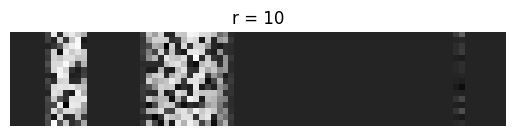

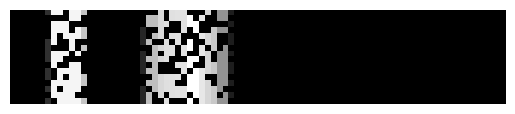

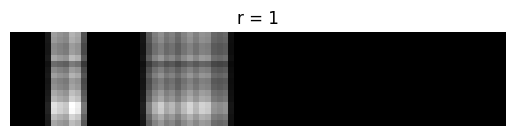

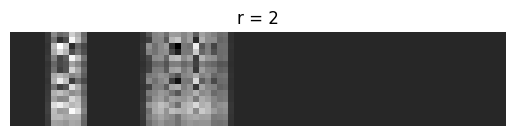

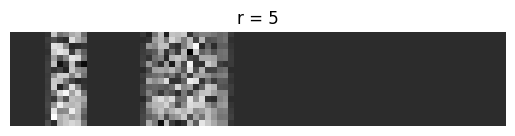

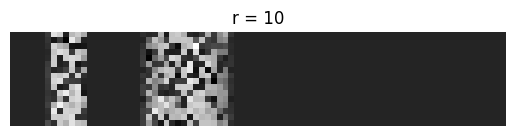

In [20]:
for i,yval in enumerate(yvals):
    xtime = gif_block[:,:,yval]
    plt.figure(i)
    plt.axis("off")
    plt.imshow(xtime, cmap="gray")


    X = xtime
    
    U, S, VT = np.linalg.svd(X,full_matrices=False)
    S = np.diag(S)
    
    j = 0
    for r in (1,2,5,10):
        # Construct approximate image
        Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
        plt.figure(i+j+1)
        j += 1
        img = plt.imshow(Xapprox)
        img.set_cmap('gray')
        plt.axis('off')
        plt.title('r = ' + str(r))
        plt.show()

In [19]:
yvals = [0, 10, 20 , 30, 40, 50, 60, 70]
